In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1240\817526314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='type', palette='viridis')


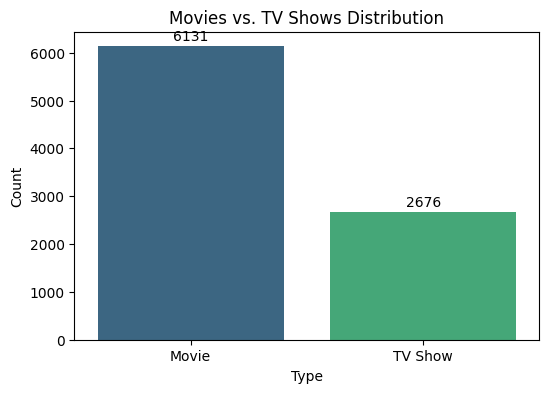

In [31]:
# Movies vs. TV Shows Distribution with Data Labels
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='type', palette='viridis')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title("Movies vs. TV Shows Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


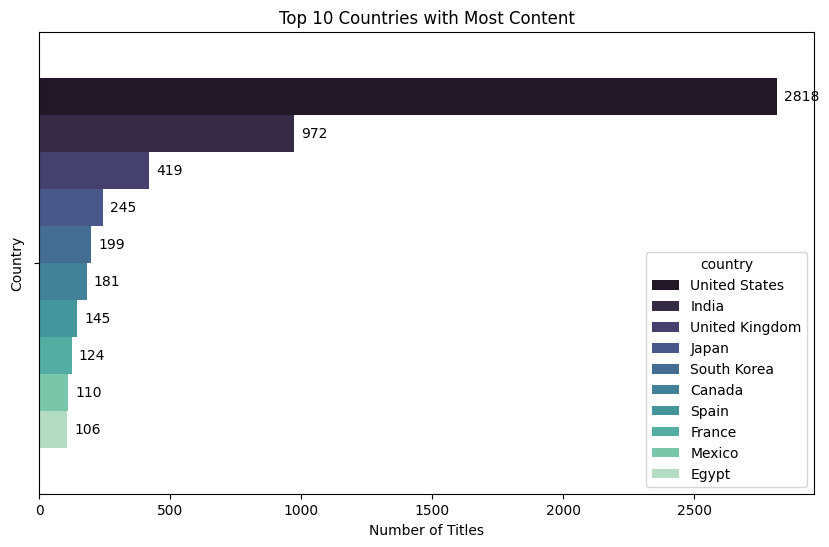

In [44]:
# Plot the top 10 countries with most content and add data labels
plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().head(10)
ax = sns.barplot(hue=top_countries.index, x=top_countries.values, palette='mako')

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.title("Top 10 Countries with Most Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

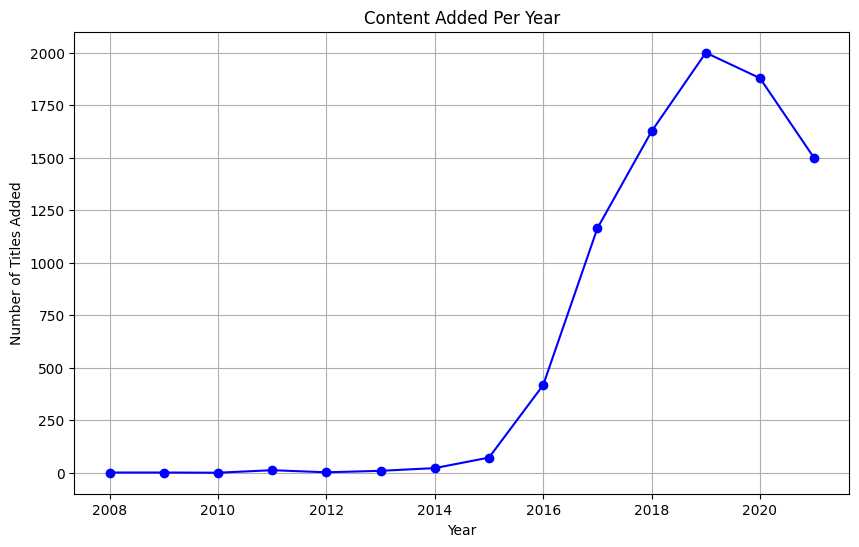

In [33]:
# Convert 'date_added' to datetime, handle errors by coercing invalid dates to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year

# Count content per year, handling NaT values by excluding them
content_per_year = df['year_added'].dropna().value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
content_per_year.plot(kind='line', marker='o', color='b')
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1240\641718632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='coolwarm', width=0.7)  # Adjust width for space


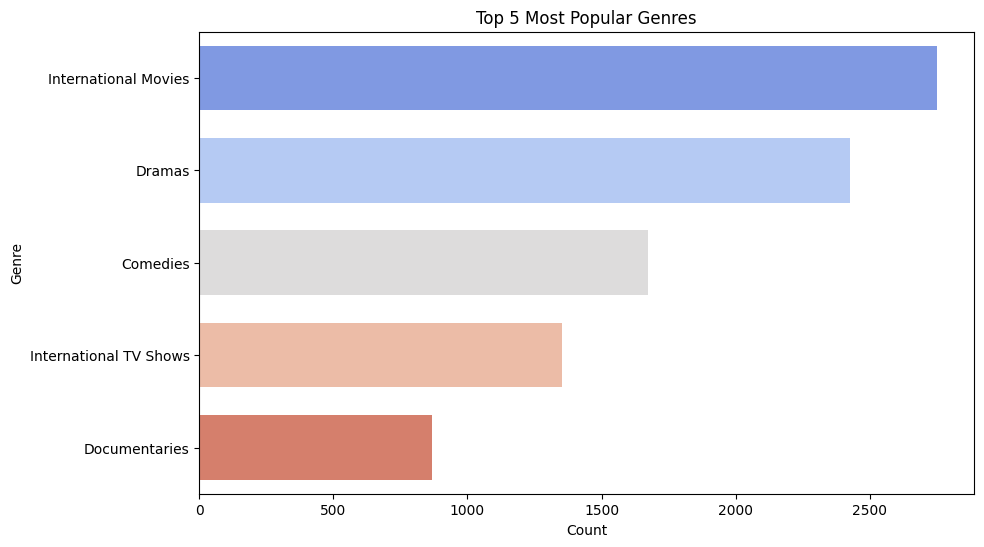

In [40]:
# Count the top 5 genres
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(5)

# Create the bar plot with adjusted bar width for spacing
plt.figure(figsize=(10, 6))
sns.barplot(x=genres.values, y=genres.index, palette='coolwarm', width=0.7)  # Adjust width for space
plt.title("Top 5 Most Popular Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1240\3582028208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='Set2')


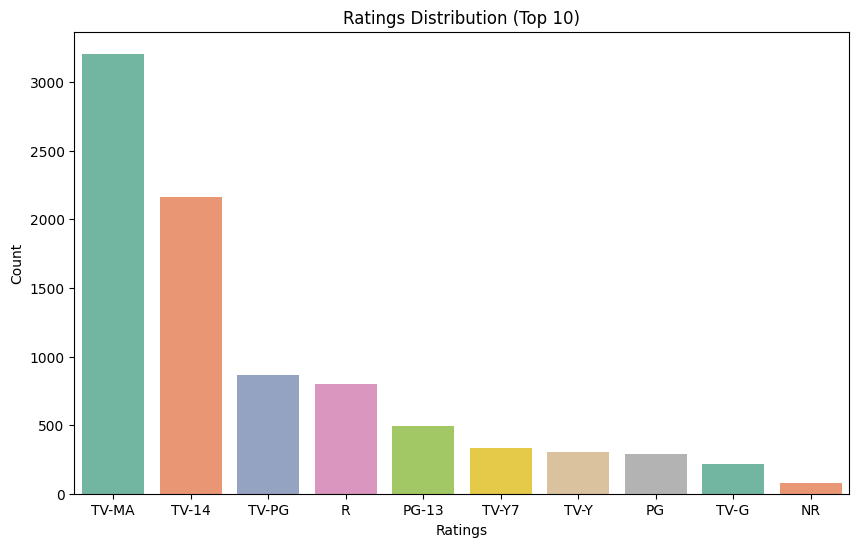

In [41]:
# 6. Ratings Distribution
plt.figure(figsize=(10, 6))
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='Set2')
plt.title("Ratings Distribution (Top 10)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

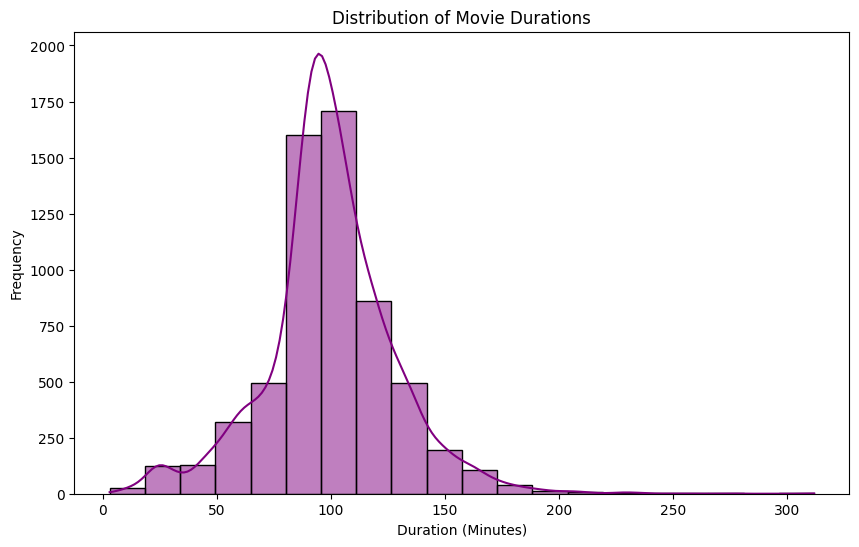

In [42]:
# 7. Duration Analysis (Movies Only)
movie_durations = df[df['type'] == 'Movie']['duration'].dropna()
movie_durations = movie_durations.str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(movie_durations, bins=20, kde=True, color='purple')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1240\4156610576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette='Spectral')


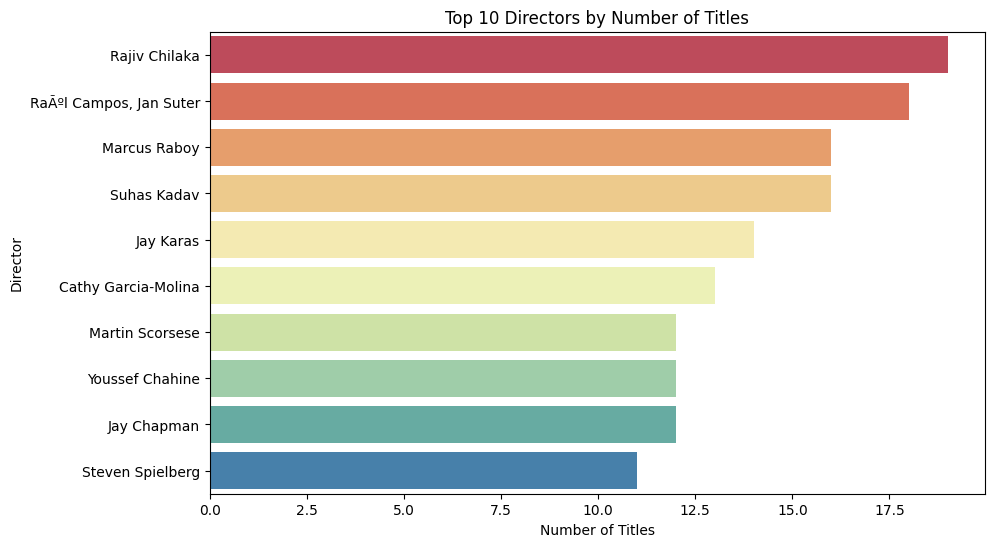

In [46]:
# 8. Insights Based on Directors (Top 10 Directors by Content Count)
plt.figure(figsize=(10, 6))
top_directors = df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette='Spectral')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

Conclusion:
Dataset Overview: The dataset provides valuable insights into movies and TV shows from various countries and genres, offering a broad view of global content distribution.

Movies vs. TV Shows: Movies outnumber TV shows, indicating a stronger focus on movies in platforms like Netflix.

Top 10 Countries: The United States, India, and the United Kingdom lead in content production, showcasing global content dominance.

Content Added Per Year: Content additions peaked in 2019 and have steadily increased, highlighting growing global demand for streaming.

Top 5 Genres: International Movies and Dramas are the most popular genres, with a wide appeal across global audiences.

Ratings Distribution: TV-MA-rated content is most common, reflecting a preference for mature themes.

Movie Duration: Movie durations mainly fall between 60-120 minutes, offering a mix of short and long content.

Top 10 Directors: Directors like Rajiv Chilaka and Raúl Campos have made significant contributions to the content library.

Key Takeaways:
Content Growth: Rising content additions reflect growing streaming demand.
Global Appeal: International and drama genres dominate, indicating a broad audience reach.
Mature Themes: The preference for TV-MA-rated content points to an adult-focused audience.
Influential Directors: Key directors shape the platform’s content with multiple titles.
These insights reflect trends in content production and the increasing global nature of streaming platforms.








